## Analysis to predict Breast Cancer

### Introduction

Besides skin cancer, breast cancer is the most commonly diagnosed cancer among American women. In 2019, it's estimated that about 30% of newly diagnosed cancers in women will be breast cancers. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a "Tumor". A tumor does not mean cancer - tumors can be Benign (B, not cancerous), pre-malignant (pre-cancerous), or Malignant (M, cancerous).The dataset is showing some factors that might influence breast cancer. The dataset has historic medical records of 569 patients and 32 variables. It contains 569 samples of malignant and benign tumor cells.

### Project Motivation and Goal

The labels in the data being discrete, the predication would fall into two categories, Malignant or Benign, making this is a classification problem. The goal, therefore, would be to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we will have to use certain machine learning classification methods that can predict the discrete class of a new input.

#### Importing the Libraries

In [26]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

#### Loading the Dataset

In [11]:
data = pd.read_csv(r'C:\Users\Gaurav\Desktop\Breast Cancer\Data\breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Inspecting the Data

In [35]:
#since "id" column does not give us much information, we can drop it
data.drop('id', axis =1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

From the above results, we see that the column "diagnosis" is 569 non-null object, while the rest are float.

In [14]:
#checking for missing variables, if any
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [15]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

We see that "diagnosis" is a categorical variable because it shows a fixed number of possible values (i.e, Malignant (M) or Benign (B)). The machine learning algorithms want numbers, and not strings, as their inputs so we will need to convert them later.

### Exploratory Data Analysis (EDA)

#### Descriptive statistics
Condensing key characteristics of the data set into simple numeric metrics, like: mean, standard deviation, correlation, etc.

In [24]:
#Calculating the descriptive statistics for each variable
#"mean" is the mean of each column and "50%" is the median
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [19]:
# Skew results in either a positive (right) or negative (left) skew value on a plot, and the values that are near 0 show less skew.

data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

#### Visualization (Analyzing the variables separately) 
This part is important as it will give us some idea about the variables, which one plays a major role in deciding the cancer detection. It includes projecting the data into Cartesian plane or into abstract images. This part of data exploration is leveraged for preprocessing of the data, data modeling, and interpretation of results.

B    357
M    212
Name: diagnosis, dtype: int64

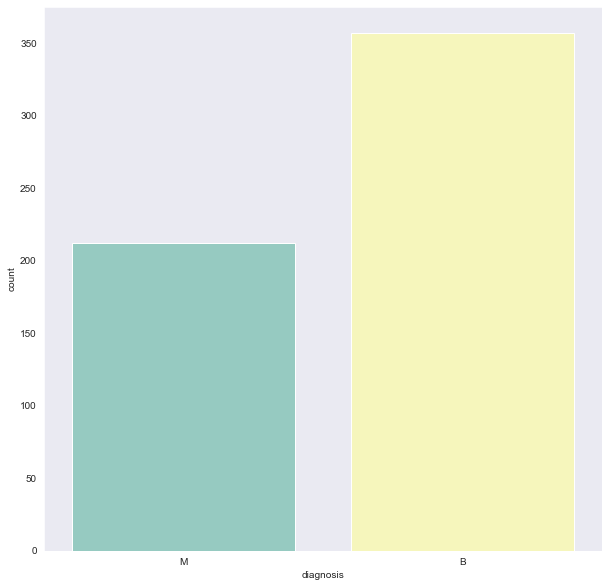

In [40]:
# frequency of cancer diagnosis (M or B)

sns.set_style("dark")
sns.set_context({"figure.figsize": (10, 10)})
sns.countplot(data['diagnosis'],label='Count',palette="Set3")

data['diagnosis'].value_counts()

This shows that there are 357 patients in the data that do not have cancer cells and 212 patients that show the presence of cancer cells.

Index(['diagnosis'], dtype='object')
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


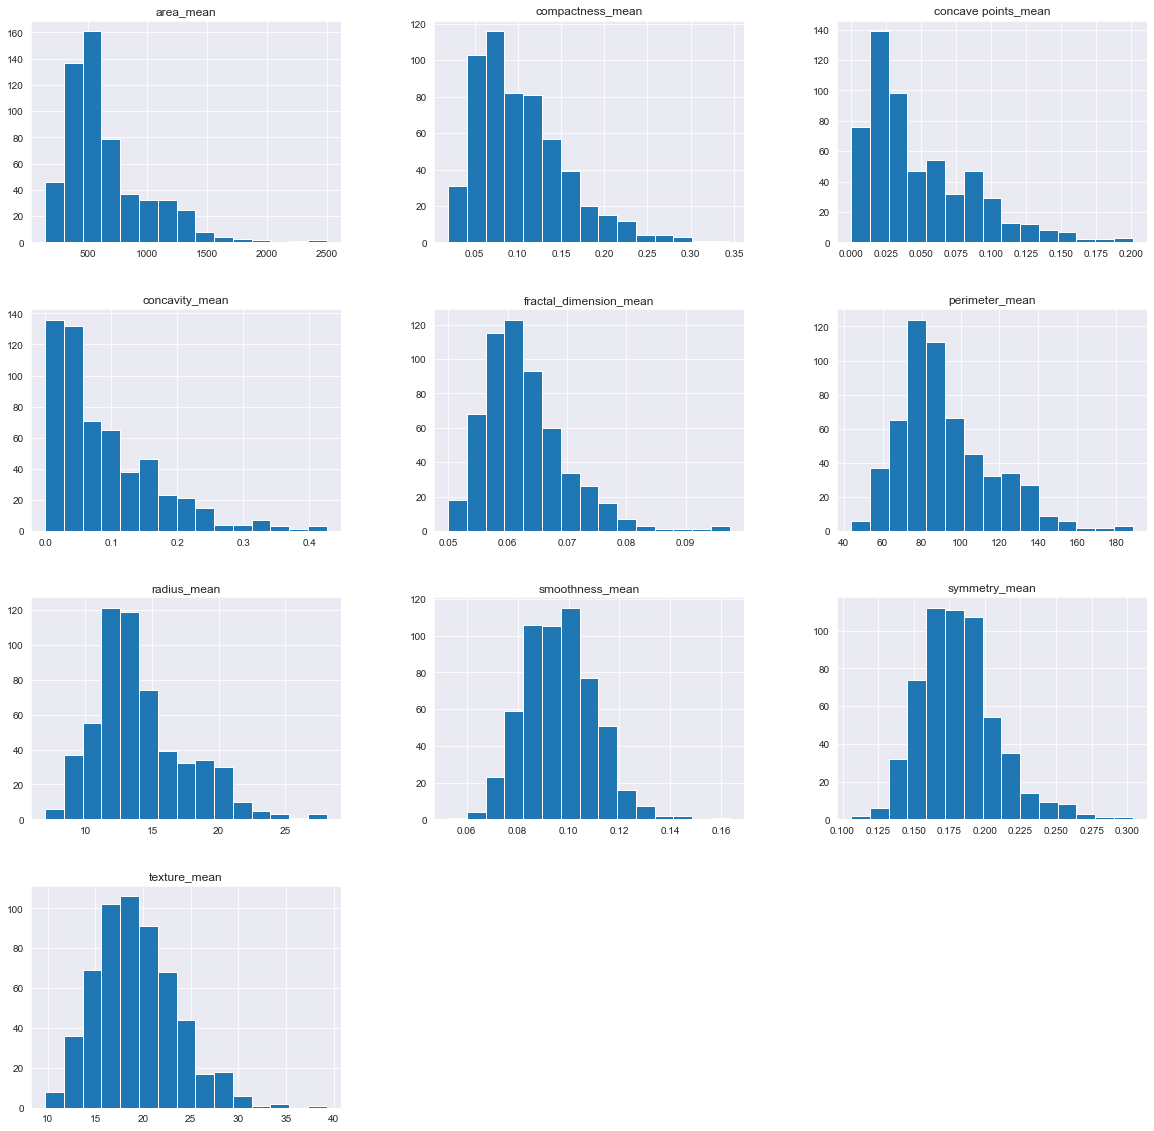

In [53]:
# plotting the columns as groups of mean/ worst/ etc. 

diag1 = data.loc[:,["diagnosis"]]

data_mean=data.iloc[:,1:11] # these locations have the variables ending in "_mean", hence a function of mean
print(diag1.columns)
print(data_mean.columns)

mean_histogram = data_mean.hist(bins=15, figsize=(20,20))

Index(['diagnosis'], dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst'],
      dtype='object')


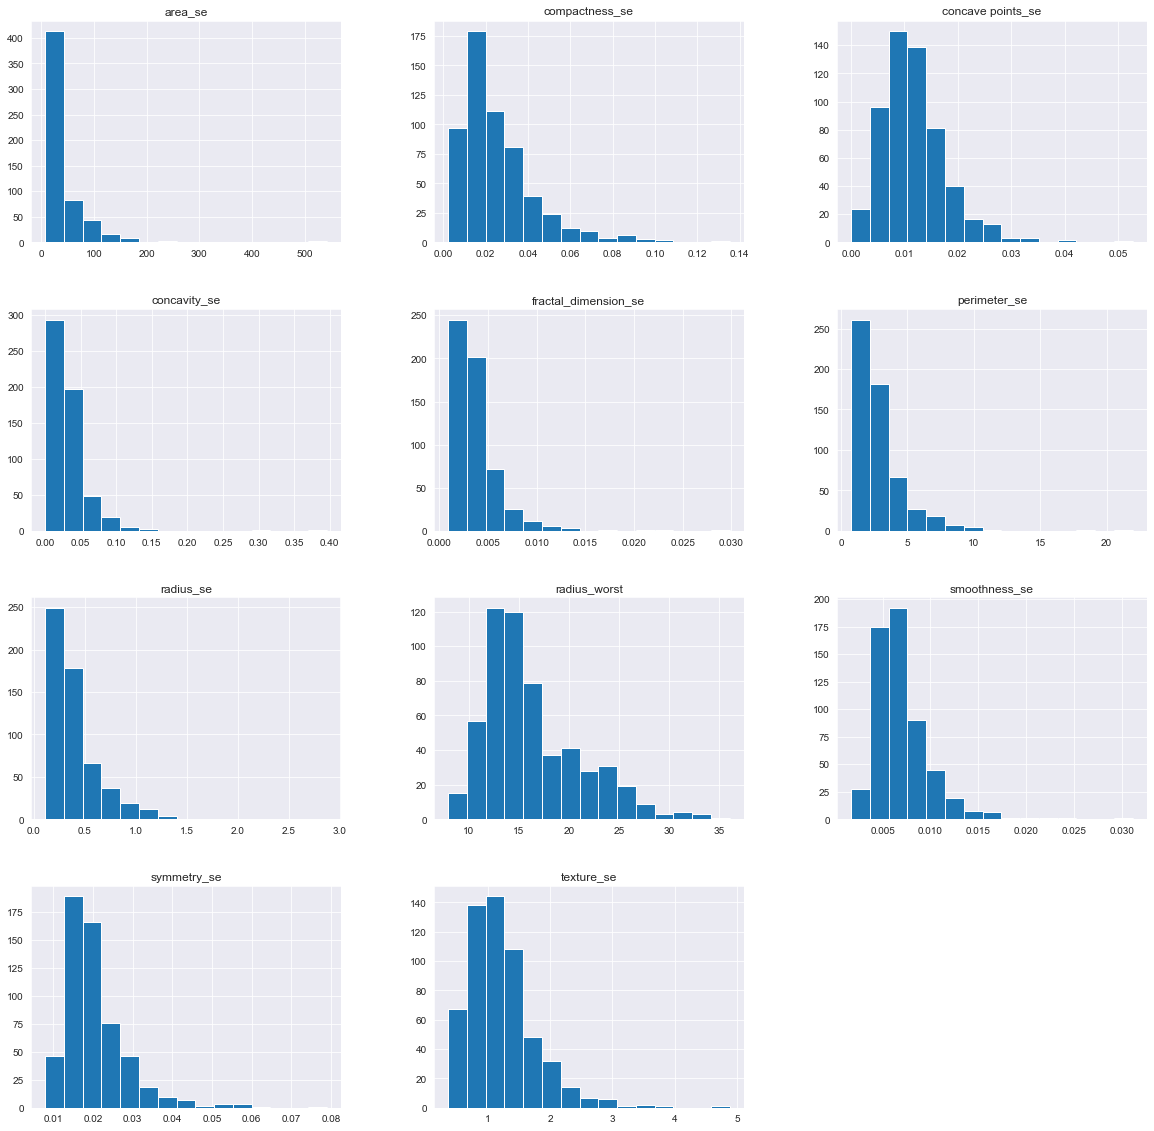

In [54]:
diag2 = data.loc[:,["diagnosis"]]

data_se = data.iloc[:,11:22] # these locations have the variables ending in "_se"
print(diag2.columns)
print(data_se.columns)

se_histogram = data_se.hist(bins=15, figsize=(20,20))

Index(['diagnosis'], dtype='object')
Index(['perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


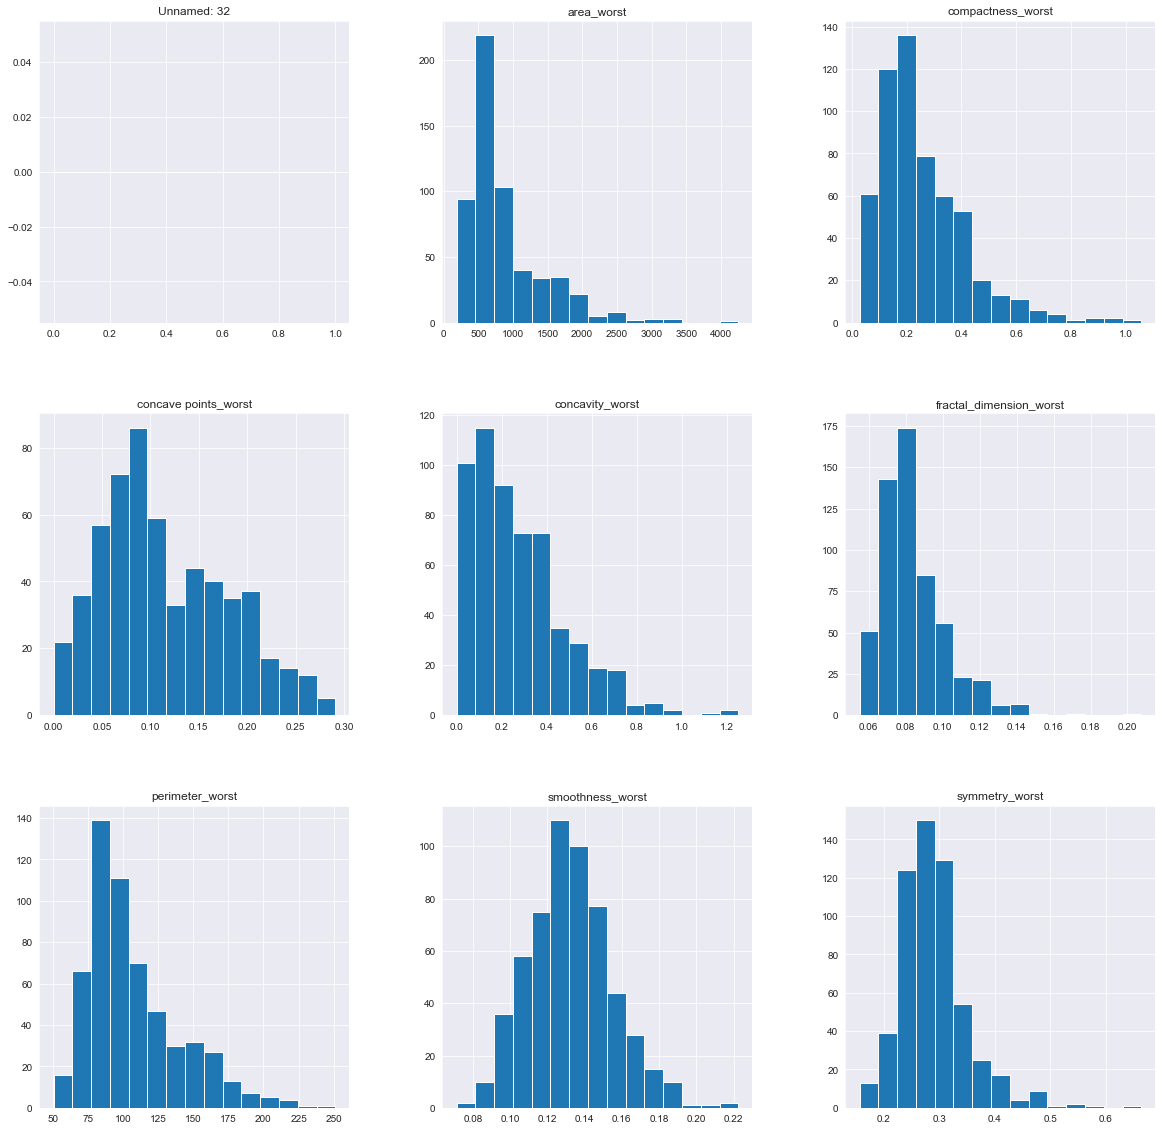

In [55]:
diag3 = data.loc[:,["diagnosis"]]

data_worst = data.iloc[:,23:] # these locations have the variables ending in "_worst"
print(diag3.columns)
print(data_worst.columns)

worst_histogram = data_worst.hist(bins=15, figsize=(20,20))

These plots show some exponential and some Gaussian distributions. These variables would be important for our further analysis because the Machine Learning techniques use these distributions on the input variables. 